##  What is a neuron?

A *neuron* (also called a *perceptron*) is the central unit of arithmetic in ANNs. What a neuron does is get some inputs and spit out an output. The simplest way to think about it is as follows:

A neuron is similar to a linear regression model, where the output of the linear regression is fed into a nonlinear function called an *activation function*. As in the linear regression model, there are separate parameters (called *weights*) for each feature and there's a bias. But don't get confused; neurons are not trained with OLS, as is typical when training linear regression models. Instead of OLS, you'll use backpropagation and a variant of the gradient descent algorithm to determine the correct values of the weights. You'll learn about activation functions, backpropagation, and gradient descent in later lessons. So, for now, focus on understanding what a neuron does.

You may have already wondered why they are called *neurons*. That's because, in ANNs, the concept of the neuron is inspired by how human brains work. Human brains have billions of neurons that are connected to each other. Hence, neurons constitute a huge network. The neurons in ANNs are the analogical counterpart of the biological neurons in brains.

The figure below sketches a single neuron. In a compact representation, a neuron gets an input and applies a linear transformation to it. Then it feeds the output of this transformation to an activation function, and the neuron spits out the result of the activation function. Notice that the output is a single numerical value (a scalar), no matter how many features the neuron gets as inputs. It just aggregates them, applies a nonlinear function, and produces a single numerical value.

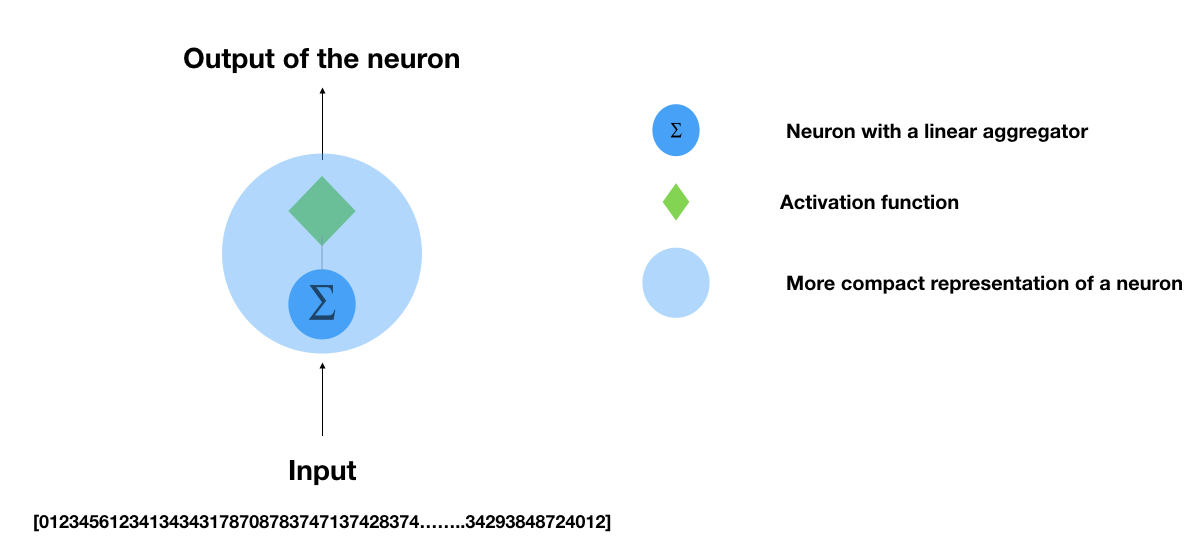

To formalize what you've already learned about neurons in ANNs, next, take a look at how to formulate a neuron mathematically.

### Mathematical representation of a neuron

As mentioned before, inside a single neuron, two mathematical operations are applied:

1. **Linear transformation of the input:** $y=b+x_1 \cdot w_1+x_2 \cdot w_2+\ldots +x_n \cdot w_n$

2. **Activation (output of the neuron):** $Activation\_fn(y) = Activation\_fn(b+x_1 \cdot w_1+x_2 \cdot w_2+ \ldots +x_n \cdot w_n)$

Where $n$ represents the size of the input vector (or the number of features), $x_1,\ldots,x_n$ represents the values in the input vector of size $n$, and $b$ represents the bias term. $w_1,\ldots,w_n$ represents the weights of the neuron. Here, $b$ and $w_i$ are the parameters to be estimated.

Now that you know what a neuron is, look at what neurons constitute together.

## What is a layer?

In its simplest form, a *layer* is a collection of neurons that simultaneously process their inputs and simultaneously spit out their outputs. Every deep-learning model consists of layers and layers stacked consecutively. That is, the output of a given layer is the input of the next layer.

The diagram below sketches the basic architecture of an ANN:


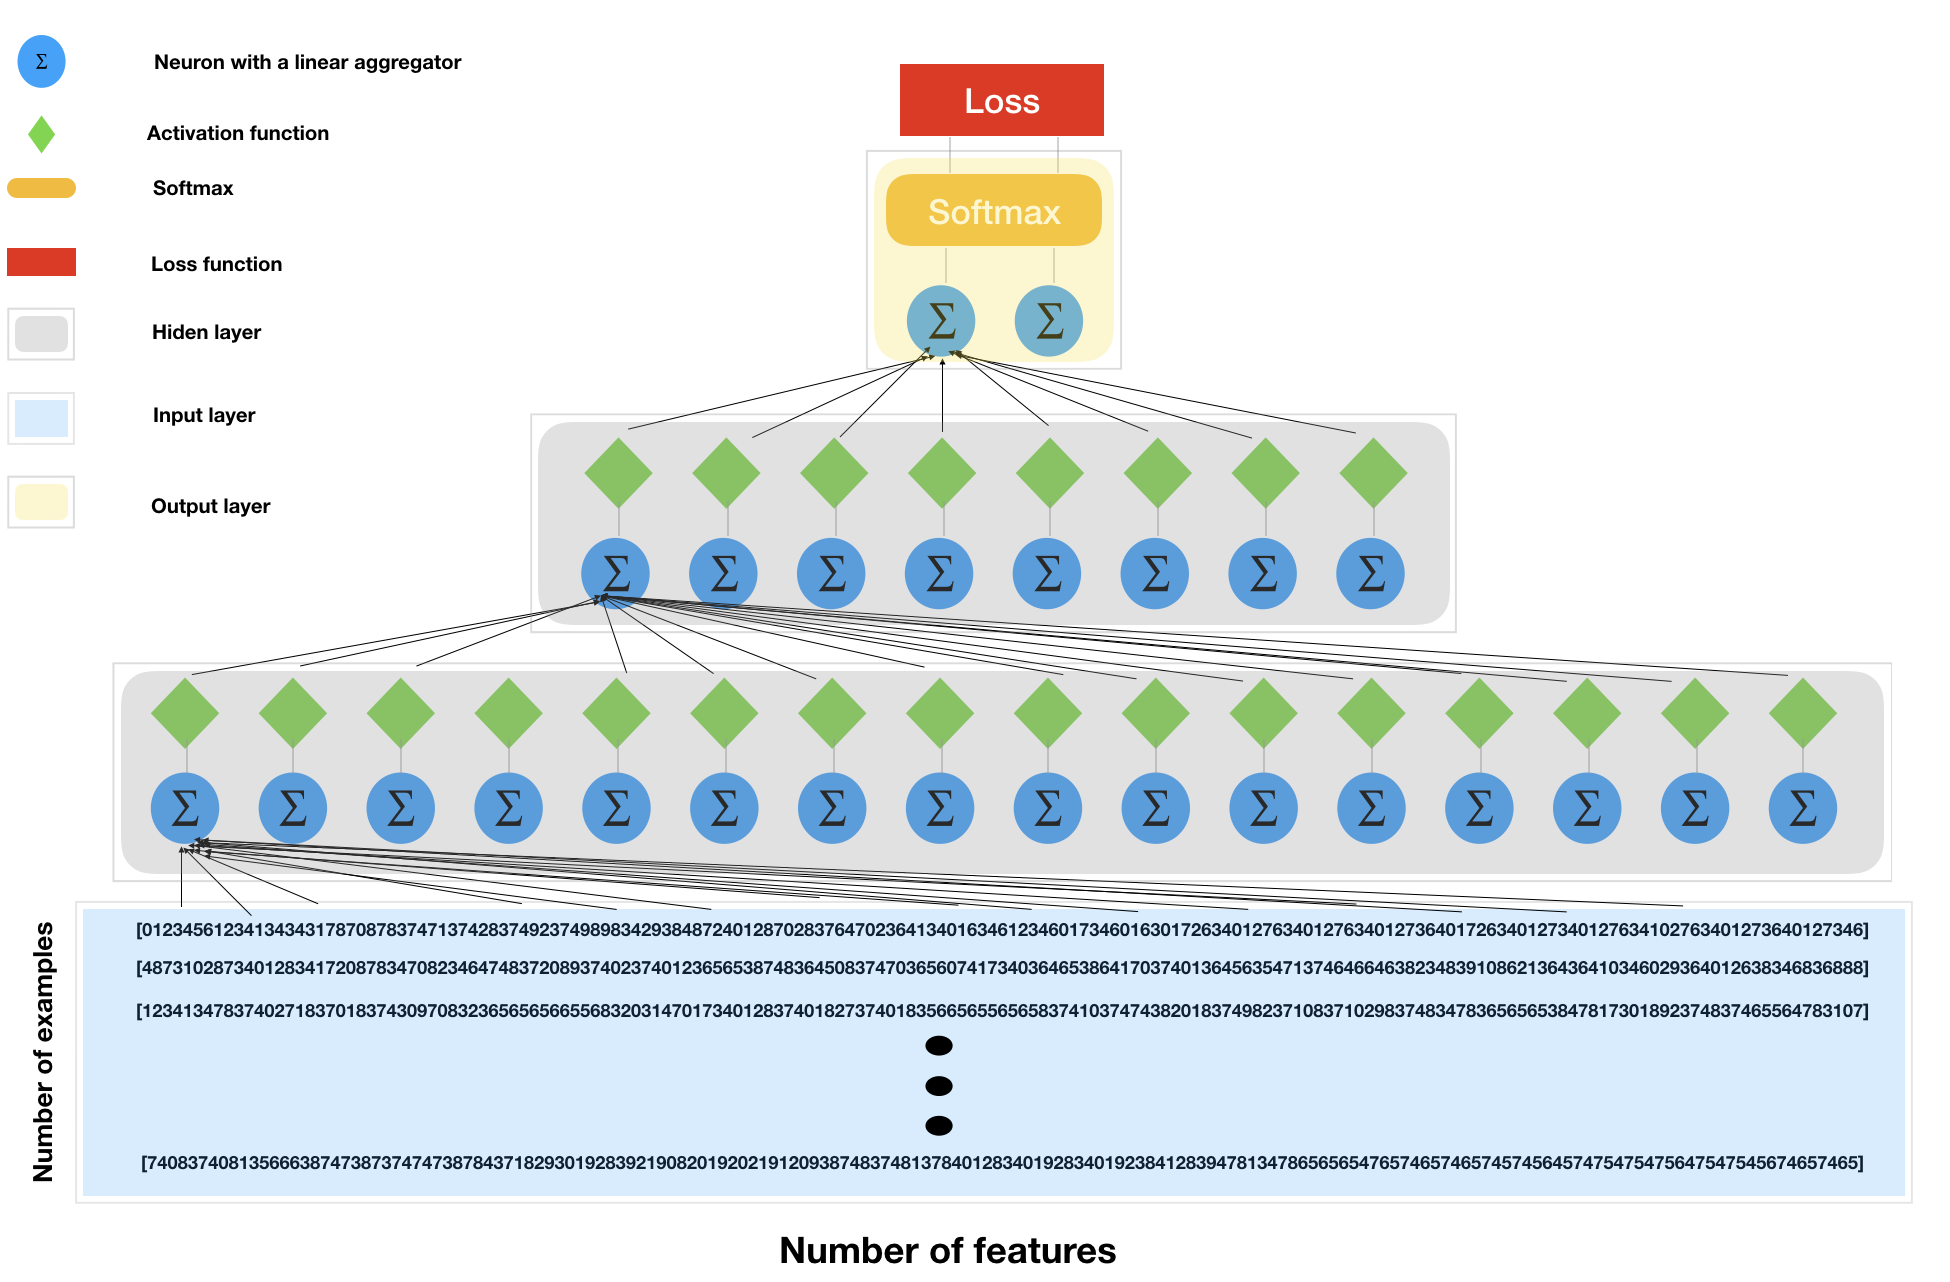

Don't worry about the activation and loss functions right now. You'll learn about them later. But notice that in the figure above, the model has an input layer, two hidden layers, and an output layer. In ANNs, as well as in all other types of deep-learning models, there are broadly three groups of layers:

* The **input layer** represents the input vector that is fed into the network. Typically, this input vector has two dimensions `(a,b)`:
    * The first dimension (a) represents the number of observations.
    * The second dimension (b) represents the number of features.
    * However, some data may have three or more dimensions. For example, image data has three dimensions `(a,b,c)`:
        * The first dimension (a) represents the number of observations.
        * The second dimension (b) represents the number of features.
        * The third dimension (c) represents the color channel (RGB).
* The **output layer** is the last layer in a deep model. It produces the output. The number of neurons in the output layer depends on the task at hand. Usually, the output layer consists of a single neuron if the task is regression. If the task is classification, then the number of neurons in the output layer is the same as the category size.
* The **hidden layer** is the layer that lies between the input and the output layers. In order to have a deep model, you need to have at least one hidden layer. In a deep model, there are typically several neurons in each hidden layer. There are many types of hidden layers, including the following:
    * The **dense layer** is the one that is used in the ANNs. You'll be using this type of layer throughout this module.
    * The **convolutional layer** is the layer that is used in convolutional neural networks (CNNs).
    * The **recurrent layer** is the layer that is used in recurrent neural networks (RNNs).
    * There are also other types of hidden layers; usually, these are hybrids of the layers described above. But in this module, you'll only need to know about these three types.
    
As mentioned, you'll focus on the dense layer in this module. A *dense layer* consists of several neurons, and the number of neurons in a dense layer is a hyperparameter of the network that needs to be determined. Next, take a look at how to formulate a dense layer mathematically.

### Mathematical representation of a dense layer

For a dense layer where you have $m$ number of neurons, the output of the layer can be represented as a set of $m$ equations:

$$Activation\_fn(y_1)=b_1+x_{11} \cdot w_{11}+x_{12} \cdot w_{12}+ \ldots +x_{1n}\cdot w_{1n}$$
$$Activation\_fn(y_2)=b_2+x_{21}\cdot w_{21}+ x_{22} \cdot w_{22}+ \ldots +x_{2n} \cdot w_{2n}$$
$$\vdots$$
$$Activation\_fn(y_m)=b_m+x_{m1} \cdot w_{m1}+x_{m2} \cdot w_{m2}+ \ldots +x_{mn} \cdot w_{mn}$$

In the matrix form:

$$Activation\_fn(Y)=Activation\_fn(Wx+b)$$

In $x_{ij}$, $b_i$, and $w_{ij}$, subscript $i$ represents the index of the neurons and runs from 1 to $m$, and subscript $j$ represents the index of the input vector (the index of the features) and runs from 1 to $n$. As you saw earlier in this lesson, $n$ represents the size of the input vector.

## How many layers?

A very natural question to ask when designing an ANN architecture is how many layers you need to put in your model. First of all, you need to know that the number of layers in a model is another hyperparameter of the model. So, the number of layers needs to be determined outside of the training process—say, by doing k-fold cross-validation. That being said, the reason behind having different layers is somewhat complicated to understand.

In theory, an ANN with a single hidden layer that has a sufficiently large but finite number of neurons can represent any mathematical function. This is called the [universal approximation theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem). But, in practice, finding that ANN for a given function is almost impossible. Yet, this theorem still gives a sense of how powerful deep models are in terms of their representation capabilities.

One of the reasons for having stacked layers in a network is this: In a shallow model, how do you get the interactions of the inputs? You can craft them by hand—but for complex interactions, this is almost impossible. Consider images, videos, or texts, which are inherently complex data types.

For example, how can you detect whether there's a human face in an image? Complex shapes, like the shapes of ears, eyes, and faces, are hard to come by in handmade designed interactions. But you can think of them as the combinations of the edges. Edges combine in some way and establish a shape like an ear, eye, or face. In deep models, layers on top of layers enable features to interact with each other. The interactions can become very complex, and this is why deep-learning models are good at representation learning.

When you're designing a deep-learning model, you should always consider the following tradeoff:

* The deeper the model, the better it is at finding complex interactions and representation.
    
* But increasing the layer also increases the number of parameters to be estimated. Hence, the computation time increases as well.
    
* Moreover, the more parameters that you have to estimate, the more data that you need in order to train your models.

As a result, the number of layers and the number of neurons in each layer are hyperparameters to be determined. There's no single golden rule about these numbers; the best values for these numbers depend on the task at hand.